In [5]:
from sympy import *
from sympy.physics.hydrogen import R_nl
init_printing()

x = symbols('x')

# Code Generation 

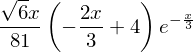

In [31]:
expr = R_nl(3, 1, x, 1)
expr

In [32]:
from sympy.utilities.autowrap import ufuncify
from sympy.utilities.lambdify import lambdify

fn_numpy   = lambdify(x, expr, 'numpy')
fn_fortran = ufuncify([x], expr)

## They work the same

In [33]:
from numpy import linspace
xx = linspace(0, 1, 5)
fn_numpy(xx)

array([ 0.        ,  0.02666343,  0.0469299 ,  0.06182246,  0.07222782])

In [34]:
fn_fortran(xx)

array([ 0.        ,  0.02666343,  0.0469299 ,  0.06182246,  0.07222782])

## Plot form with matplotlib

In [35]:
from matplotlib.pyplot import plot, show, legend
%matplotlib inline

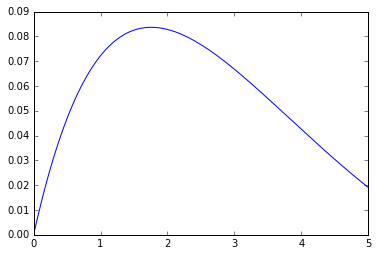

In [36]:
xx = linspace(0, 5, 50000)  # More points 
plot(xx, fn_numpy(xx))

In [37]:
# Time fn_numpy
%timeit fn_numpy(xx)

1000 loops, best of 3: 841 µs per loop


In [38]:
# Time fn_fortran
%timeit fn_fortran(xx)

1000 loops, best of 3: 654 µs per loop


## More complex problem

Lets compute both the expression and its derivative simultaneously. 


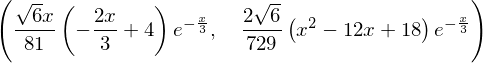

In [42]:
outputs = expr, simplify(expr.diff(x))
outputs

In [44]:
fn_numpy  = lambdify([x], outputs, 'numpy')

fns_fortran = [ufuncify([x], output) for output in outputs]
fn_fortran  = lambda xx: [fn_fortran(xx) for fn_fortran in fns_fortran]

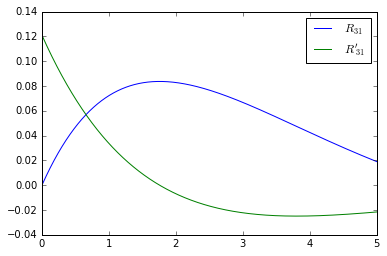

In [46]:
for y in fn_numpy(xx):
    plot(xx, y)
legend(['$R_{31}$', "$R'_{31}$"])

In [47]:
%timeit fn_numpy(xx)

1000 loops, best of 3: 1.6 ms per loop


In [48]:
%timeit fn_fortran(xx)

1000 loops, best of 3: 1.29 ms per loop
